<a href="https://colab.research.google.com/github/Nurhidaya244012/PMA_MRTB1123/blob/main/A2_PMA_MRTB_1123_Nurhidaya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the uploaded Healthcare_Study.xlsx file
healthcare_file = '/content/Healthcare_Study.xlsx'
healthcare_data = pd.read_excel(healthcare_file)

# Display the first few rows to inspect the structure
healthcare_data.head()

,Age,Recovery Time (Days),Pain Score,Hospital Type,Smoking Status,Insurance Type,Diet Category,Physical Activity Level
0,69,9,4,Private,Non-Smoker,Private Plan,Unhealthy,Moderate
1,32,10,6,Public,Non-Smoker,Public Plan,Unhealthy,High
2,78,15,10,Public,Smoker,Public Plan,Unhealthy,Moderate
3,38,7,6,Public,Smoker,Private Plan,Healthy,Moderate
4,41,10,8,Specialty,Non-Smoker,Public Plan,Unhealthy,Moderate


In [ ]:
# Re-import necessary modules after environment reset
import pandas as pd

# Reload the uploaded Healthcare_Study.xlsx file
healthcare_file = '/content/Healthcare_Study.xlsx'
healthcare_data = pd.read_excel(healthcare_file)

# Display the first few rows to inspect the structure
healthcare_data.head()

,Age,Recovery Time (Days),Pain Score,Hospital Type,Smoking Status,Insurance Type,Diet Category,Physical Activity Level
0,69,9,4,Private,Non-Smoker,Private Plan,Unhealthy,Moderate
1,32,10,6,Public,Non-Smoker,Public Plan,Unhealthy,High
2,78,15,10,Public,Smoker,Public Plan,Unhealthy,Moderate
3,38,7,6,Public,Smoker,Private Plan,Healthy,Moderate
4,41,10,8,Specialty,Non-Smoker,Public Plan,Unhealthy,Moderate


In [ ]:
# Calculate descriptive statistics for 'Recovery Time (Days)'
recovery_time = healthcare_data['Recovery Time (Days)']
mean_recovery = recovery_time.mean()
std_recovery = recovery_time.std()
median_recovery = recovery_time.median()
iqr_recovery = recovery_time.quantile(0.75) - recovery_time.quantile(0.25)

# Compile the results
recovery_stats = {
    'Mean': mean_recovery,
    'Standard Deviation': std_recovery,
    'Median': median_recovery,
    'Interquartile Range (IQR)': iqr_recovery
}

recovery_stats

{'Mean': np.float64(9.885),
 'Standard Deviation': 2.8832866157464654,
 'Median': 10.0,
 'Interquartile Range (IQR)': np.float64(4.0)}

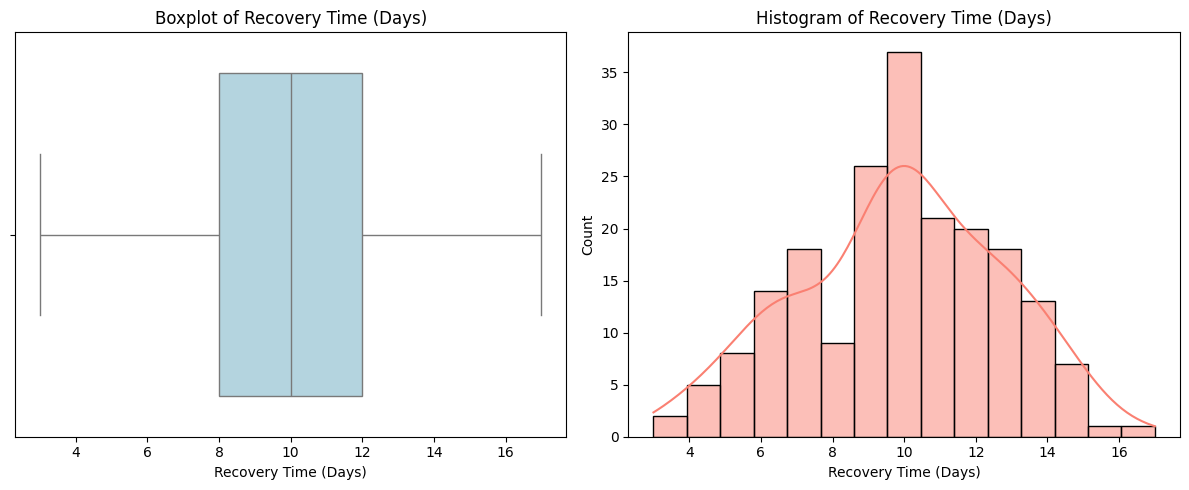

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot style

# Create Boxplot and Histogram for Recovery Time
plt.figure(figsize=(12, 5))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=recovery_time, color='lightblue')
plt.title('Boxplot of Recovery Time (Days)')
plt.xlabel('Recovery Time (Days)')

# Histogram
plt.subplot(1, 2, 2)
sns.histplot(recovery_time, bins=15, kde=True, color='salmon')
plt.title('Histogram of Recovery Time (Days)')
plt.xlabel('Recovery Time (Days)')

plt.tight_layout()
plt.show()

Results saved to 'Correlation_Results.xlsx'.


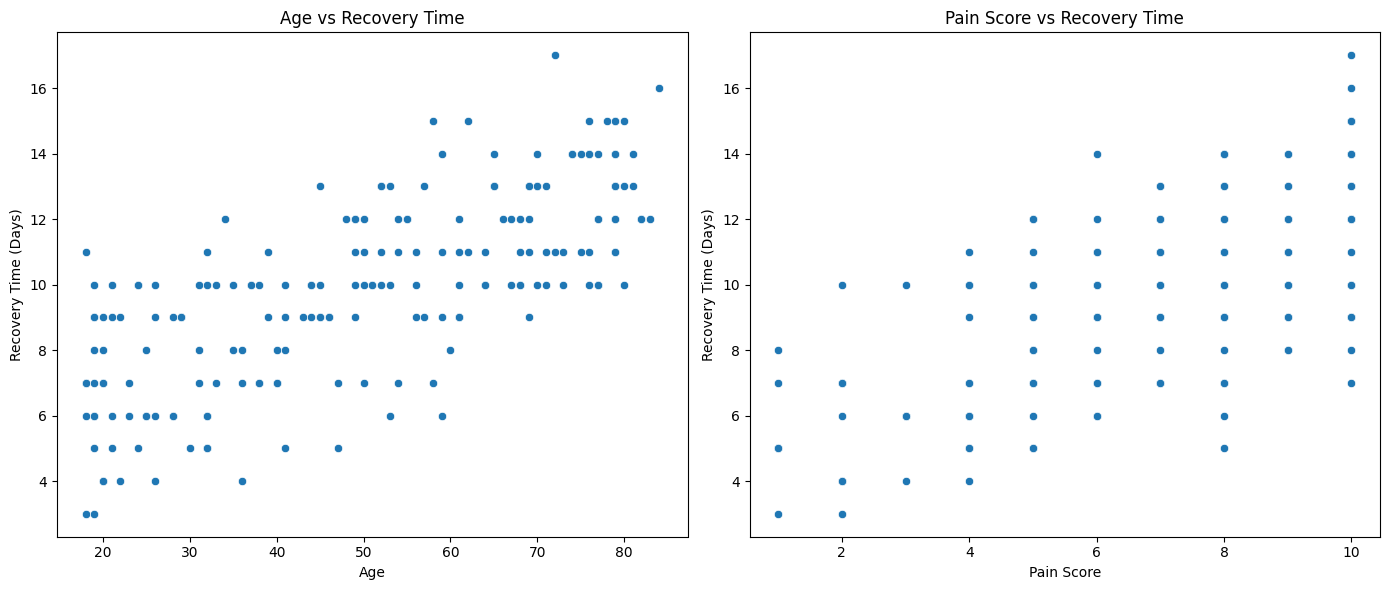

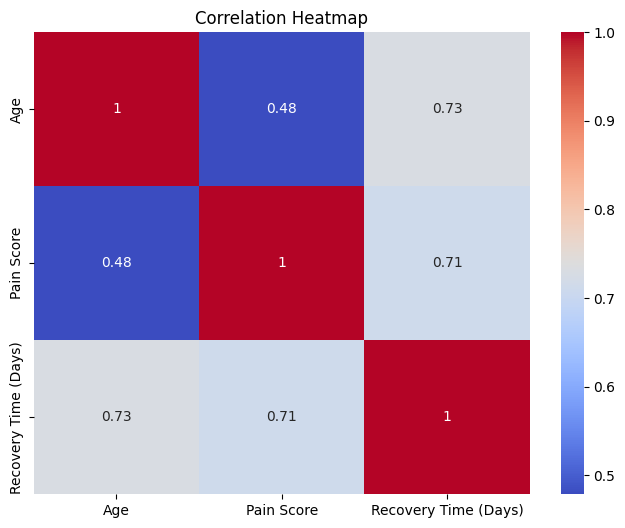

In [ ]:
import pandas as pd
from scipy.stats import pearsonr, pointbiserialr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
df = pd.read_excel("Healthcare_Study.xlsx")

# 1. Pearson Correlation: Age & Recovery Time
corr_age, p_age = pearsonr(df['Age'], df['Recovery Time (Days)'])

# 2. Pearson Correlation: Pain Score & Recovery Time
corr_pain, p_pain = pearsonr(df['Pain Score'], df['Recovery Time (Days)'])

# 3. Point-Biserial Correlation: Recovery Time & Diet Category
df['Diet Binary'] = df['Diet Category'].map({'Healthy': 1, 'Unhealthy': 0})
corr_diet, p_diet = pointbiserialr(df['Diet Binary'], df['Recovery Time (Days)'])

# 4. Chi-Square Test: Physical Activity Level & Diet Category
contingency_table = pd.crosstab(df['Physical Activity Level'], df['Diet Category'])
chi2, p_chi, dof, expected = chi2_contingency(contingency_table)

# Save Results to Excel
results = pd.DataFrame({
    'Test': [
        'Age & Recovery Time (Pearson)',
        'Pain Score & Recovery Time (Pearson)',
        'Recovery Time & Diet Category (Point-Biserial)',
        'Physical Activity Level & Diet Category (Chi-Square)'
    ],
    'Correlation/Chi2': [corr_age, corr_pain, corr_diet, chi2],
    'p-value': [p_age, p_pain, p_diet, p_chi],
    'Significance (5% level)': [
        'Significant' if p_age < 0.05 else 'Not Significant',
        'Significant' if p_pain < 0.05 else 'Not Significant',
        'Significant' if p_diet < 0.05 else 'Not Significant',
        'Significant' if p_chi < 0.05 else 'Not Significant'
    ]
})

results.to_excel("Correlation_Results.xlsx", index=False)
print("Results saved to 'Correlation_Results.xlsx'.")

# Visualization: Scatter Plots for Continuous Variables
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=df['Age'], y=df['Recovery Time (Days)'])
plt.title('Age vs Recovery Time')
plt.xlabel('Age')
plt.ylabel('Recovery Time (Days)')

plt.subplot(1, 2, 2)
sns.scatterplot(x=df['Pain Score'], y=df['Recovery Time (Days)'])
plt.title('Pain Score vs Recovery Time')
plt.xlabel('Pain Score')
plt.ylabel('Recovery Time (Days)')

plt.tight_layout()
plt.show()

# Heatmap: Correlation Matrix for Numerical Variables
plt.figure(figsize=(8, 6))
corr_matrix = df[['Age', 'Pain Score', 'Recovery Time (Days)']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Calculate the 90th percentile of Recovery Time (Days)
percentile_90 = recovery_time.quantile(0.90)
percentile_90

np.float64(14.0)

In [ ]:
from scipy.stats import wilcoxon

# Assume 'recovery_time' holds the recovery data.
stat, p_value = wilcoxon(recovery_time - 10)
print('Test Statistic:', stat)
print('p-value:', p_value)

Test Statistic: 6431.5
p-value: 0.6751361761760386


In [ ]:
# Step 1: Import Required Libraries
import pandas as pd
from scipy.stats import wilcoxon

# Step 2: Load the Dataset
df = pd.read_excel("Healthcare_Study.xlsx")  # Replace with your actual file path
recovery_time = df['Recovery Time (Days)']

# Step 3: Calculate the Differences from Hypothesized Median (10 days)
differences = recovery_time - 10

# Step 4: Run Wilcoxon Signed-Rank Test
# H₀: Median = 10
# H₁: Median ≠ 10
stat, p_value = wilcoxon(differences)

# Step 5: Display Results
print(f"Test Statistic: {stat}")
print(f"p-value: {p_value}")

# Step 6: Decision
if p_value < 0.05:
    print("Reject the null hypothesis: The median recovery time significantly differs from 10 days.")
else:
    print("Fail to reject the null hypothesis: No significant difference from 10 days median.")

Test Statistic: 6431.5
p-value: 0.6751361761760386
Fail to reject the null hypothesis: No significant difference from 10 days median.


In [ ]:
import pandas as pd
from scipy.stats import pearsonr, chi2_contingency, pointbiserialr

# Load Dataset
df = pd.read_excel("Healthcare_Study.xlsx")

# 1. Correlation: Age & Recovery Time (Pearson)
corr_age, p_age = pearsonr(df['Age'], df['Recovery Time (Days)'])

# 2. Correlation: Pain Score & Recovery Time (Pearson)
corr_pain, p_pain = pearsonr(df['Pain Score'], df['Recovery Time (Days)'])

# 3. Correlation: Recovery Time & Diet Category (Point-Biserial, assuming 2 categories)
# Convert Diet Category to binary (1 = Healthy, 0 = Unhealthy)
df['Diet Binary'] = df['Diet Category'].map({'Healthy': 1, 'Unhealthy': 0})
corr_diet, p_diet = pointbiserialr(df['Diet Binary'], df['Recovery Time (Days)'])

# 4. Association: Physical Activity Level & Diet Category (Chi-Square Test)
contingency_table = pd.crosstab(df['Physical Activity Level'], df['Diet Category'])
chi2, p_chi, dof, expected = chi2_contingency(contingency_table)

# Print Results
print("1. Age & Recovery Time (Pearson):", corr_age, "p-value:", p_age)
print("2. Pain Score & Recovery Time (Pearson):", corr_pain, "p-value:", p_pain)
print("3. Recovery Time & Diet Category (Point-Biserial):", corr_diet, "p-value:", p_diet)
print("4. Physical Activity Level & Diet Category (Chi-Square Test): Chi2 =", chi2, "p-value:", p_chi)

1. Age & Recovery Time (Pearson): 0.7310602195674498 p-value: 1.0375029986276632e-34
2. Pain Score & Recovery Time (Pearson): 0.7126430134502935 p-value: 2.599438970955318e-32
3. Recovery Time & Diet Category (Point-Biserial): nan p-value: nan
4. Physical Activity Level & Diet Category (Chi-Square Test): Chi2 = 8.65425913452322 p-value: 0.07034686798529245


In [ ]:
import pandas as pd
from scipy.stats import pearsonr, pointbiserialr, chi2_contingency

# Step 1: Load Dataset
df = pd.read_excel("Healthcare_Study.xlsx")  # Update with your file path if needed

# Step 2: Pearson Correlation - Age & Recovery Time
corr_age, p_age = pearsonr(df['Age'], df['Recovery Time (Days)'])

# Step 3: Pearson Correlation - Pain Score & Recovery Time
corr_pain, p_pain = pearsonr(df['Pain Score'], df['Recovery Time (Days)'])

# Step 4: Point-Biserial Correlation - Recovery Time & Diet Category
# Convert Diet Category to binary (assuming 'Healthy' and 'Unhealthy')
df['Diet Binary'] = df['Diet Category'].map({'Healthy': 1, 'Unhealthy': 0})
corr_diet, p_diet = pointbiserialr(df['Diet Binary'], df['Recovery Time (Days)'])

# Step 5: Chi-Square Test - Physical Activity Level & Diet Category
contingency_table = pd.crosstab(df['Physical Activity Level'], df['Diet Category'])
chi2, p_chi, dof, expected = chi2_contingency(contingency_table)

# Step 6: Display Results
print("========== Correlation Analysis Results ==========\n")

print(f"1. Age & Recovery Time (Days):")
print(f"   Correlation coefficient (r): {corr_age:.3f}")
print(f"   p-value: {p_age:.4f}")
print("   Interpretation:", "Significant" if p_age < 0.05 else "Not significant")

print(f"\n2. Pain Score & Recovery Time (Days):")
print(f"   Correlation coefficient (r): {corr_pain:.3f}")
print(f"   p-value: {p_pain:.4f}")
print("   Interpretation:", "Significant" if p_pain < 0.05 else "Not significant")

print(f"\n3. Recovery Time (Days) & Diet Category:")
print(f"   Correlation coefficient (r): {corr_diet:.3f}")
print(f"   p-value: {p_diet:.4f}")
print("   Interpretation:", "Significant" if p_diet < 0.05 else "Not significant")

print(f"\n4. Physical Activity Level & Diet Category (Chi-Square Test):")
print(f"   Chi2 Statistic: {chi2:.3f}")
print(f"   p-value: {p_chi:.4f}")
print("   Interpretation:", "Significant" if p_chi < 0.05 else "Not significant")

print("\n===================================================\n")

========== Correlation Analysis Results ==========

1. Age & Recovery Time (Days):
   Correlation coefficient (r): 0.731
   p-value: 0.0000
   Interpretation: Significant

2. Pain Score & Recovery Time (Days):
   Correlation coefficient (r): 0.713
   p-value: 0.0000
   Interpretation: Significant

3. Recovery Time (Days) & Diet Category:
   Correlation coefficient (r): nan
   p-value: nan
   Interpretation: Not significant

4. Physical Activity Level & Diet Category (Chi-Square Test):
   Chi2 Statistic: 8.654
   p-value: 0.0703
   Interpretation: Not significant


